### =========================================================================================

# KECERDASAN BUATAN

## NAMA    : RYAN DARMAWAN SIREGAR
## NIM        : 09011381722091
## SK5 U | UJIAN AKHIR SEMESTER KECERDASAN BUATAN

### =========================================================================================

# Convolutional Neural Network

# Pendeteksian Penyakit Myocardial Infarction dengan Metode Covolutional Neural Network 1-Dimension (CNN 1D)

### AWALAN

<div>
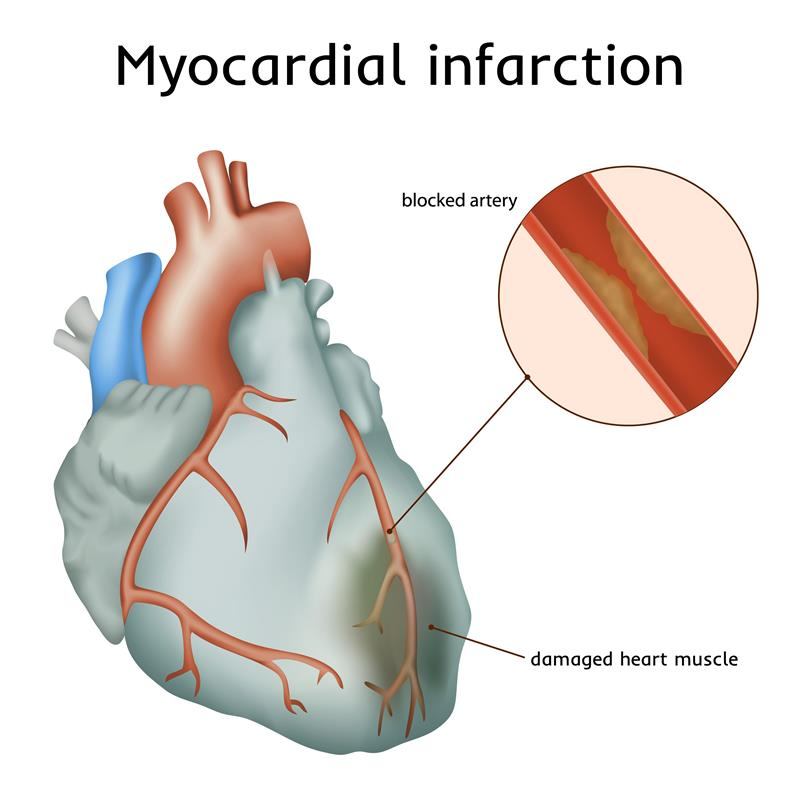
</div>
**sumber foto : http://www.independentnurse.co.uk/clinical-article/primary-care-management-following-an-acute-myocardial-infarction/216357/ **


Myocardial Infarction atau yang biasa dikenal sebagai serangan jantung. Penyakit ini dapat terjadi dikarenakan jumlah oksigen sedikit yang masuk ataupun aliran darah menurun sehingga menyebabkan kerusakan pada otot jantung.

Dalam mendeteksi penyakit tersebut maka dapat dilihat melalui *electrocardiogram* (EKG). EKG ini merupakan cara untuk mendapatkan suatu sinyal. Pada manusia dasarnya memiliki aliran sinyal listrik yang kecil sehingga dapat dilihat berdasarkan hasil EKG terhadap jantung tersebut.

Pada Myocardial Infarction, fokus sinyalnya ada pada abnormalnya sinyal ST pada hasil rekam jantung. 

### =========================================================================================

### PERTAMA 

Pertama, melakukan deklarasi terhadp library yang akan digunakan. Library ini berguna pada saat notebook/code ini dijalankan dan mempermudah dalam code dikarenakan cukup menggunakan library terutama pada CNN. Berikut library yang digunakan

1. numpy             | untuk oprasi matematika dan array.
2. keras             | sebagai backend yang digunakan untuk tensorflow pada saat operasi CNN.
3. matplotlib.pyplot | sebagai library dalam membuat plot.

Kemudian, ada juga dengan memanggil beberapa fungsi dari library sebagai berikut
1. "from sklearn.model_selection import train_test_split" perintah ini berfungsi sebagai pemisah antara file trainning dengan testing dengan hanya memasukkan besarnya split antara 0 hingga 1. Sehingga dengan fungsi ini, kita dapat memisahkan file train dan test sebelum dilakukan compile.
2. "from sklearn.preprocessing import MinMaxScaler" berfungsi dalam melakukan preprocessing terhadap dataset dimana jika nilai fitur dataset yang tidak beraturan (ada yang besar maupun ada yang kecil) maka dengan MinMax dapat menskalakan ke nilai 0 hingga 1 atau -1 hingga 1. Sehingga dengan menggunakan MinMax dapat mempermudah CNN dalam melakukan compile dan rekognisi dikarenakan nilai tersebut diskalakan.
3. "from keras.models import Sequential"
4. "from keras import optimizers" berfungsi berbagai macam optimizer yang disediakan oleh keras seperti Adam, SGD, RMSprop, dan lainnya. Pada kasus ini digunakan optimizer Adam dengan learning rate default (lr = 0.001)
5. "from keras.layers import Reshape" reshape ini berguna untuk melakukan reshaping atau membuat bentuk bari dari suatu data
6. "from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D,GlobalAveragePooling1D" pada bagian ini merupakan untuk mengatur dari CNN 1D itu sendiri dimana mulai dari jumlah dense/neuronnya, library aktivasi seperti relu, sigmoid, dll, inisialisasi penggunaan CNN 1D, dan sistem CNN 1D-nya.
7. "from sklearn.metrics import confusion_matrix" berguna dalam membuat confusion matrix, confusion matrix ini lah dimana kita menjadikannya sebagai bahan acuan untuk menentukan hasil akhir.

In [2]:
import numpy as np 
import keras
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras import optimizers
from keras.layers import Reshape
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D,GlobalAveragePooling1D
from sklearn.metrics import confusion_matrix

### =========================================================================================

### KEDUA

Kedua, memanggil dataset yang akan digunakan. Pada kasus ini, terdapat dua dataset dimana dataset tersebut yang satunya merupakan dataset sinyal jantung sehat dan satunya merupakan dataset sinyal jantung yang terkena Myocardial Infarction. Dataset ini didapatkan dari kaggle dengan bertipe 1 dan 0 (0 pada sehat dan 1 pada tidak sehat). Dataset tersebut dapat dilihat pada tautan berikut https://www.kaggle.com/shayanfazeli/heartbeat.

Pada dataset, digunakannya fungsi numpy array.

Dikarenakan terdapat dua dataset antara yang normal dan abnormal, maka dapat dilakukan yang namanya concatenate atau penggabungan dataset seperti kodingan dibawah:

In [3]:
######################################## READ DATA VIA NP.LOADTXT (NP ARRAY) ########################################
PTBDB_NORMAL = np.loadtxt("C:/Users/User/PRAKKK/input/ptbdb_normal.csv", delimiter=',') 
PTBDB_ABNORMAL = np.loadtxt("C:/Users/User/PRAKKK/input/ptbdb_abnormal.csv", delimiter=',')

######################################## SLICING SESUAI DENGAN JUMLAH KOLOM ########################################
dynamic_normal = (PTBDB_NORMAL).shape[1]
dynamic_abnormal = (PTBDB_ABNORMAL).shape[1]

######################################## PENGGABUNGGAN ARRAY ANTARA NORMAL DAN ABNORMAL ########################################
NORMAL = PTBDB_NORMAL[:, 0:dynamic_normal]
ABNORMAL = PTBDB_ABNORMAL[:, 0:dynamic_abnormal]
dataset = np.concatenate((NORMAL,ABNORMAL),axis=0)
dataset

array([[1.        , 0.90032417, 0.35858995, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.79468149, 0.37538651, ..., 0.        , 0.        ,
        0.        ],
       [0.90902895, 0.79148209, 0.42316866, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.86797142, 0.67412239, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.98467171, 0.6588881 , ..., 0.        , 0.        ,
        1.        ],
       [0.99788582, 0.70031714, 0.4640592 , ..., 0.        , 0.        ,
        1.        ]])

Penggunaan dynamic didalam dataset gunanya untuk agar dapat mengikuti berapa jumlah kolom yang merupakan fitur. Kemudian penggunaan slicng untuk menghindari kolom berlebih pada saat menggabungkan dataset.

In [4]:
print('==================BANYAK DATA=================')
print('==============================================\n')
print(' AXIS ARRAY NORMAL   = ',(PTBDB_NORMAL).shape)
print(' AXIS ARRAY ABNORMAL = ',(PTBDB_ABNORMAL).shape)
print(' AXIS ARRAY DATASET  = ',(dataset).shape)
print('==============================================\n')
print(' Sehingga dataset normal memiliki Row Sebanyak ',(PTBDB_NORMAL).shape[0],' dan kolom sebanyak',(PTBDB_NORMAL).shape[1])
print(' Dataset abnormal memiliki Row Sebanyak ',(PTBDB_ABNORMAL).shape[0],' dan kolom sebanyak',(PTBDB_ABNORMAL).shape[1])
print(' Dan dataset keseluruhan memiliki Row Sebanyak ',(dataset).shape[0],' dan kolom sebanyak',(dataset).shape[1])

==================BANYAK DATA=================

 AXIS ARRAY NORMAL   =  (4046, 188)
 AXIS ARRAY ABNORMAL =  (10506, 188)
 AXIS ARRAY DATASET  =  (14552, 188)

 Sehingga dataset normal memiliki Row Sebanyak  4046  dan kolom sebanyak 188
 Dataset abnormal memiliki Row Sebanyak  10506  dan kolom sebanyak 188
 Dan dataset keseluruhan memiliki Row Sebanyak  14552  dan kolom sebanyak 188


### =========================================================================================

### KETIGA

Ketiga, dilakukan slicing untuk memisahkan bagian kolom fitur dan bagian kolom label. Pada dataset ini, dataset ini merupakan dataset sinyal jantung dan memiliki fitur sebanyak 187 kolom (kolom 1 hingga kolom 187) dan kolom label sebanyak 1 kolom (kolom ke 188).

In [5]:
features = dataset[:, 0:187]
labels = dataset [:, 187]

Maka dari slicing tersebut, isi pada fitur sebagai berikut:

In [6]:
features

array([[1.        , 0.90032417, 0.35858995, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.79468149, 0.37538651, ..., 0.        , 0.        ,
        0.        ],
       [0.90902895, 0.79148209, 0.42316866, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.86797142, 0.67412239, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.98467171, 0.6588881 , ..., 0.        , 0.        ,
        0.        ],
       [0.99788582, 0.70031714, 0.4640592 , ..., 0.        , 0.        ,
        0.        ]])

Maka dari slicing tersebut, isi pada label sebagai berikut:

In [7]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

Data pada label merupakan data yang berbentuk binary yaitu 0 dan 1 dan data pada features merupakan data angka float dimana merupakan point dari suatu sinyal jantung. Maka fitur pada tiap row dapat diplot menjadi bentuk sinyal jantung dengan cara berikut:

label  =  0.0
Representasi Sinyal Jantung Sehat


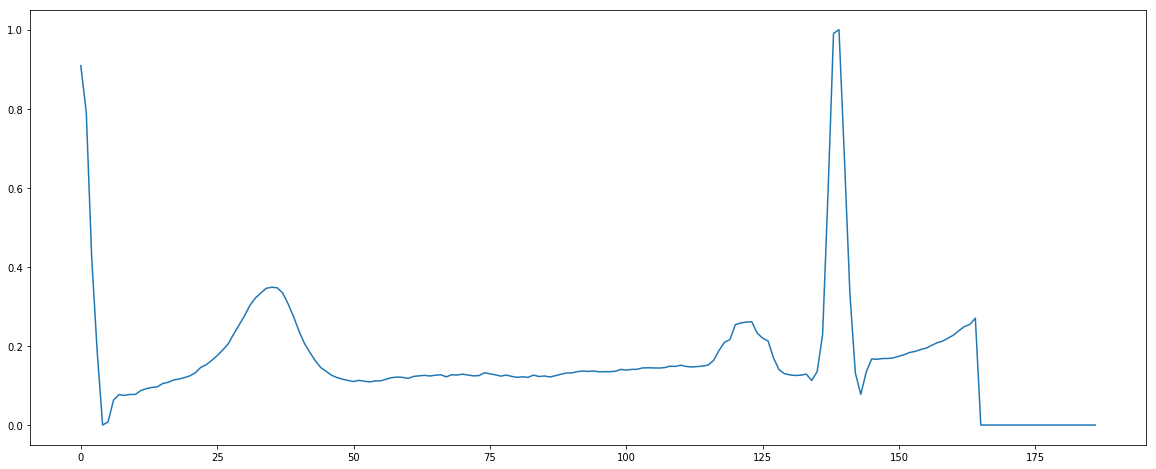

In [8]:
ROW = 2
Nilai_Label = dataset.item(ROW,187)
fig,(ax0) = plt.subplots(nrows=1, figsize=(20,8))
plt.plot(np.arange(0,187,1),features[ROW])
print('label  = ',Nilai_Label)
if Nilai_Label == 0.0:
    print('Representasi Sinyal Jantung Sehat')
elif Nilai_Label == 1.0:
    print('Representasi Sinyal Jantung Tidak Sehat')

Diatas merupakan represntasi sinyal jantung sehat yang ada pada row 2 pada sinyal tersebut terdapat P Q R S dan T dari sinyal jantung tersebut

label  =  1.0
Representasi Sinyal Jantung Tidak Sehat


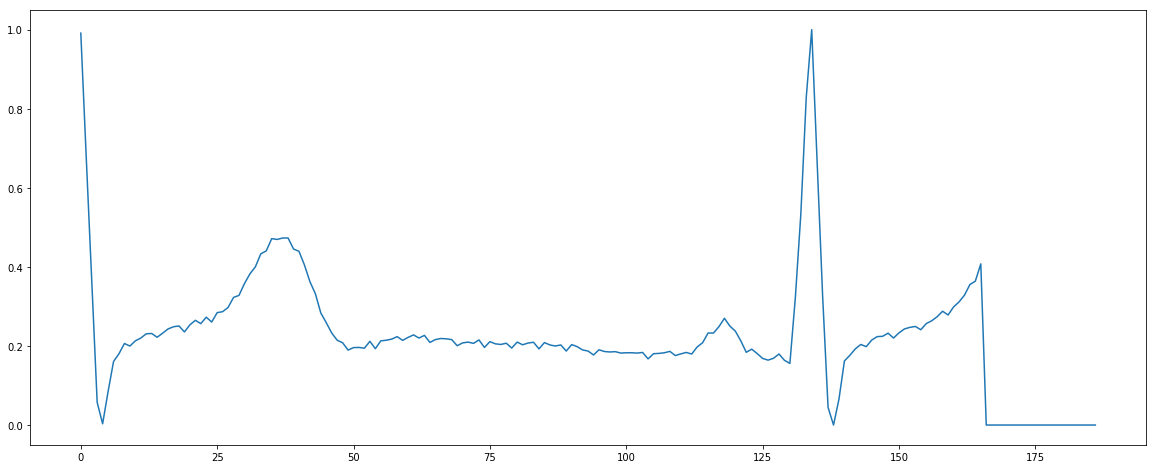

In [9]:
ROW = 13100
Nilai_Label = dataset.item(ROW,187)
fig,(ax0) = plt.subplots(nrows=1, figsize=(20,8))
plt.plot(np.arange(0,187,1),features[ROW])
print('label  = ',Nilai_Label)
if Nilai_Label == 0.0:
    print('Representasi Sinyal Jantung Sehat')
elif Nilai_Label == 1.0:
    print('Representasi Sinyal Jantung Tidak Sehat')

Diatas merupakan representasi sinyal jantung tidak sehat yang ada pada row 13100 pada sinyal tersebut. Pada penyakit Myocardial Infarction akan fokus pada bagian S dan T dari sinyal jantung.

### =========================================================================================

### KEEMPAT
Keempat, dilakukan pre-processing dimana pada program ini menggunakan Min Max Scaler. Min Max Scaler berguna untuk menskalakan nilai di dalam fitur dataset agar ada pada range yang sama. Sehingga pada seluruh fitur dataset memiliki range yang sama tanpa harus kehilangan informasi. Min Max Scaler tersebut ada dibawah ini:

In [10]:
scaler = MinMaxScaler()
features_scale = scaler.fit_transform(features)

Dari hasil Min Max Scaler tersebut, dapat dilihat apakah terjadi pre processing atau tidak dapat dibuktikan dengan perintah berikut:

In [11]:
sum_features = np.sum(features)
sum_features_scale = np.sum(features_scale)

if sum_features == sum_features_scale:
    print('Tidak terjadi pre processing')
else:
    print('Terjadi pre processing')

Terjadi pre processing


Dari perintah diatas, maka pre processing memang terjadi dan efektif, dan ini juga menandakan bahwa data belum benar-benar besih untuk skalanya.

### =========================================================================================

### KELIMA
Kelima, dilakukan splitting dengan menggunakan bantuan "train_test_split" dimana didalamnya dilakukan splitting dengan test_size dan pengacakan data row dengan shuffle. Selain itu data train_test_split dipecah kedalam training_data, testing_data, training_label, dan testing_label. Hal ini nantinya digunakan untuk proses selanjutnya.

In [12]:
training_data, testing_data, training_label, testing_label = train_test_split(features_scale, labels , 
                                                                              test_size=0.1, shuffle=True, stratify=labels)

In [13]:
dynamic3 = (features_scale).shape[1]
dynamic2 = len(training_data)
dynamic1 = len(testing_data)

AA = ((dynamic1)/(dynamic1+dynamic2))*100
BB = ((dynamic2)/(dynamic1+dynamic2))*100
print('==========PERSENTASE PENGGUNAAN DATA==========')
print('==============================================\n')
print('     Data Testing   = ',dynamic1,' baris')
print('     Data Testing   = ',AA,' % \n')
print('     Data Trainning = ',dynamic2, ' baris')
print('     Data Trainning = ',BB,' % \n')
print('==============================================')

==========PERSENTASE PENGGUNAAN DATA==========

     Data Testing   =  1456  baris
     Data Testing   =  10.005497526113249  % 

     Data Trainning =  13096  baris
     Data Trainning =  89.99450247388675  % 



Dari proses diatas, dapat diketahui jika test_size adalah 0,1 maka data testing yang digunakan yaitu 10.005497526113249% dengan penggunaan 1456 row dan data trainning yang digunakan yaitu Data Trainning = 89.99450247388675% dengan penggunaan 13096 row.

Rumus penghitungan diatas merupakan representasi dari rumus:
$$ Data\ Testing\ =\ \frac{panjang\ data\ testing}{panjang\ data\ testing\ +\ panjang\ data\ training}\ x\ 100 $$
$$ $$
$$ Data\ Training\ =\ \frac{panjang\ data\ training}{panjang\ data\ testing\ +\ panjang\ data\ training}\ x\ 100 $$

Selain itu, pada proses diatas juga terdapat variable bernama dynamic. Dynamic ini merupakan isi mengenai informasi data baik berupa baris data (dynamic 2, dynamic 1) dan kolom data (dynamic 3). Hal ini dimaksudkan agar program yang dibuat bersifat dinamis dan dapat beradaptasi dengan dataset lain yang memiliki perbedaan, sehingga tidak perlu melakukan ubahan nilai tersebut secara manual

### =========================================================================================

### KEENAM
Keenam, yaitu membuat model Neural Network dimana pada program ini yaitu membuat model CNN 1D-nya.

Yang harus dilakukan sebelum masuk kedalam model yaitu membuat data masukkan sebaga numpy array (np.asarry) baik terhadap training data maupun testing data, baru selanjutnya melakukan reshape (konstruksi ulang array) ke dalam bentuk sesuai banyak kolom (dynamic 3), banyak baris (dynamic 2) dan banyak baris yang masuk yaitu sebanyak 1 baris sehingga disusun menjadi (dynamic2, dynamic3, 1).

Maka untuk training data dan testing data yang digunakan adalah sebagai berikut:

In [14]:
training_data=np.asarray(training_data)
training_data=training_data.reshape(dynamic2, dynamic3, 1)
training_data

array([[[0.86206544],
        [0.81054515],
        [0.6863271 ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.95751978],
        [0.96601444],
        [0.49073121],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.89676444],
        [0.89285713],
        [0.64408869],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[1.        ],
        [0.80025363],
        [0.31959417],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.85827619],
        [0.6120646 ],
        [0.10701666],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.91360787],
        [0.57797104],
        [0.1031884 ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

In [15]:
testing_data=np.asarray(testing_data)
testing_data=testing_data.reshape(dynamic1, dynamic3, 1)
testing_data

array([[[1.        ],
        [0.36233544],
        [0.04693761],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[1.        ],
        [0.92799997],
        [0.47915789],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[1.        ],
        [0.86765277],
        [0.62436748],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[1.        ],
        [0.75080079],
        [0.57014734],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[1.        ],
        [0.62296748],
        [0.28506097],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.98350934],
        [1.        ],
        [0.99070489],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

Baru setelah itu, membuat model dari CNN 1D-nya. Pada code dibawah, merupakan bentuk konstruksi dari model CNN 1D yang digunakan pada program ini yang akan dijabarkan sebagai berikut:

#### 1.

In [16]:
model = Sequential()

Sequential digunakan untuk melakukan proses layer per layer atau satu proses menuju proses lain secara berurutan dan terurut.

#### 2.

In [17]:
model.add(Convolution1D(100, 5, activation='relu', input_shape=(dynamic3,1)))

Merupakan bagian input layer, sekaligus menjadi hidden layer ke-1 dari konstruksi CNN 1D yang dibuat. Pada dense, digunakan sebanyak 100 dengan jumlah windows sebanyak 5. Untuk input shape (atau dalam ANN lebih dikenal dengan input dim) menggunakan dynamic yang telah dibuat yaitu jumlah kolom (dynamic3) dan baris yang diizinkan pada satu kali iterasi yaitu 1 (dynamic3,1).

Prinsipnya, pada metode CNN 1D, setiap layer akan terjadi pengurangan fitur paa outputnya. Hal ini dikarenakan penggunaan windows (jendela) dimana pada CNN 1D pemrosesannya dilakukan per segmen, sehingga hal tersebut mampu men-decrease fitur shape yang ada ke komponen dengan shape lebih kecil

<GAMBAR>
    
Hal tersebut jika berdasarkan rumus matematikanya sebagai berikut:
$$
Output Shape \ Hidden Layer\ = {Shape\ Data\ Saat\ Ini }-{ Besarnya\ Windows\ yang\ diassign}
$$


Jika pada Hidden Layer 1, maka memiliki hasil sebagai berikut:


$$
Output Shape \ Hidden Layer 1\ = {188}-{5}
$$
$$
Output Shape \ Hidden Layer 1\ = {183}
$$

Untuk aktivasi yang ada pada poin 2 ini menggunakan ReLu. ReLu (Rectified Linear) sendiri pada dasarnya merupakan suatu aktivasi dimana melakukan "theresold" dari nilai 0 hingga infinity (x). infinity ini dikarenakan ReLu hanya membuat pembatas pada bilangan nol dimana: $$ x\ \le\ 0 $$ jika nilai dibawah atau sama dengan 0 maka x bernilai 0  $$ x\ >\ 0 $$ dan jika x lebih dari 0 maka x akan bernilai x.

Sehingga ReLu memiliki grafik aktivasi sebagai berikut:
<div>
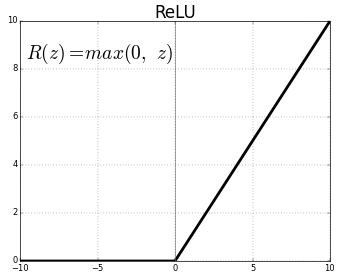
</div>
** sumber foto = https://medium.com/@samuelsena/pengenalan-deep-learning-8fbb7d8028ac **

#### 3.

In [18]:
model.add(Convolution1D(100, 6, activation='relu')) #HL2
model.add(Convolution1D(100, 8, activation='relu')) #HL3

Merupakan bagian Hidden layer ke 2 (HL2) dan ke 3 (HL3)

Pada Hidden Layer 2, memiliki jumlah dense sebanyak 100 dengan windows sebanyak 6 dan memiliki fungsi aktivasi relu.

Pada Hidden Layer 3, memiliki jumlah dense sebanyak 100 dengan windows sebanyak 8 dan memiliki fungsi aktivasi relu.

Pada Hidden Layer 2 dan 3 memiliki cara penghitungan yang sama seperti poin ke dua akan tetapi size windowsnya dikurang 1 sehingga rumusnya:

$$
Output Shape \ Hidden Layer\ = {Shape\ Data\ Saat\ Ini }-{ (Besarnya\ Windows\ yang\ di assign} - { 1)}
$$

maka penghitungan matematikanya sebagai berikut:

$$
Output Shape \ Hidden Layer 2\ = {183}-{(6}-{1)}
$$
$$
Output Shape \ Hidden Layer 2\ = {178}
$$


$$
Output Shape \ Hidden Layer 3\ = {178}-{(8}-{1)}
$$
$$
Output Shape \ Hidden Layer 3\ = {171}
$$

#### 4.

In [19]:
model.add(MaxPooling1D(3))

MaxPooling merupakan proses diskritisasi berbasis sampel dimana dengan menggunakan MaxPooling mampu mengurangi dimensinya (dalam hal ini mampu mengurangi fitur). Pengurangan berapa banyak fiturnya dapat dilihat dengan cara:

$$
Output Shape \ MaxPooling 1D\ =\ \frac{Jumlah\ Fitur\ Saat\ Ini}{Jumlah\ MaxPooling\ 1D\ yang\ diassign}
$$

sehingga jika mengacu pada nilai masukkan yaitu 3, maka fitur yang ada pada saat itu akan dibagi 3, dan hasil dibagi 3 menjadi keluaran, penghitungan matematikanya sebagai berikut:

$$
Output Shape \ MaxPooling 1D\ =\ \frac{171}{3}
$$

$$
Output Shape \ MaxPooling 1D\ = {57}
$$

#### 5.

In [20]:
model.add(Convolution1D(100, 10, activation='relu')) #HL4
model.add(Convolution1D(100, 12, activation='relu')) #HL5

Merupakan bagian Hidden layer ke 4 (HL2) dan ke 5 (HL3)

Pada Hidden Layer 4, memiliki jumlah dense sebanyak 100 dengan windows sebanyak 6 dan memiliki fungsi aktivasi relu.

Pada Hidden Layer 5, memiliki jumlah dense sebanyak 100 dengan windows sebanyak 8 dan memiliki fungsi aktivasi relu.

Pada Hidden Layer 4 dan 5 memiliki cara penghitungan yang sama dengan poin 3. Sehingga penghitungan matematikanya sebagai berikut:

$$
Output Shape \ Hidden Layer 2\ = {57}-{(10}-{1)}
$$
$$
Output Shape \ Hidden Layer 2\ = {48}
$$


$$
Output Shape \ Hidden Layer 3\ = {48}-{(12}-{1)}
$$
$$
Output Shape \ Hidden Layer 3\ = {37}
$$

Maka hasil bentuk pada CNN 1D dari awalnya berbentuk (100, 188) menjadi (100, 37).

#### 6.

In [21]:
model.add(GlobalAveragePooling1D())

Selanjutnya, hasil tersebut dimasukkan ke dalam Golbal Average Pooling 1D yang merupakan operasi yang menghitung output rata-rata dari setiap fitur. Operasi ini mampu mengurangi data secara signifikan dan menyiapkan model untu lapisan menuju output.

#### 7.

In [22]:
model.add(Dropout(0.5))

Dropout merupakan fungsi yang dapat membantu model untuk meng-generalisasi dengan secara acak untuk mengatur output untuk neuron yang diberikan ke 0. Untuk dropout biasanya default settingan ada pada 0.5

#### 8.

In [23]:
model.add(Dense(100, activation='relu')) #HL6

Bagian ini merupakan bagian Hidden Layer terakhir akan tetapi bukan lagi bagian dari bagian CNN 1D, melainkan Hidden Layer yang ditujukan sebagai perantara dari Hidden Layer CNN 1D (GlobalAveragePool) menuju Output Layer pada poin 9. Hidden layer ini memiliki dense sebanyak 100 dengan fungsi aktivasi ReLu.

#### 9.

In [24]:
model.add(Dense(units=1, activation='sigmoid')) #OL

Bagian ini merupakan Output Layer. Pada output layer ini memiliki keluaran dense sebesar satu dengan fungsi sigmoid. Penggunaan dense sebesar satu dan sigmoid dikarenakan output label keluaran yaitu 0 dan 1 (lebih dikenal sebagai binary).

Sigmoid sendiri merupakan fungsi aktivasi untuk mengambil rentang bilangan real apa-pun dan dan mengembalikan nilai output yang berada di kisaran 0 hingga 1.
<div>
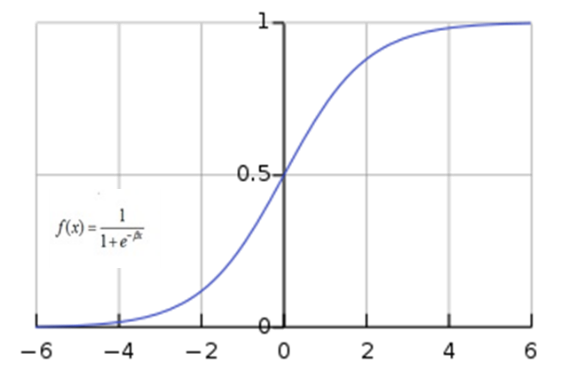
</div>
** sumber foto = https://medium.com/ai³-theory-practice-business/a-beginners-guide-to-numpy-with-sigmoid-relu-and-softmax-activation-functions-25b840a9a272 **


Fungsi sigmoid menghasilkan kurva berbentuk "S" seperti gambar diatas dimana berdasarkan konvensi, nilai output diharapkan ada dalam kisaran -1 hingga 1.
Adapun secara sistematis, sigmoid memiliki rumus sebagai berikut:
$$
f(x)=(\frac{1}{1+exp^{-x}})
$$

#### 10.

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Bagian compile merupakan bagian dimana model tersebut akan ditentukan bagaimana compiler yang akan digunakan. Pada model ini menggunakan optimizer Adam dengan fungsi loss binary_crossentropy dan metrics menggunakan accuracy.


Penjabaranyya adalah sebagai berikut:
1. Optimizer = Adam
    
    Adam merupakan optimizer yang terbuat berdasarkan kombinasi RMSprop dan Sthochastic Gradient Descent (SGD) with momentum.
    

2. Loss = binary_crossentropy
    
    Fungsi binary_crossentropy ini digunakan ketika label bukan merupakan multi-class yaitu 0 dan 1.
    
    
3. metrics = accuracy

    Metric adalah akurasi dikarenakan pada program ini dari fungsi compile tadi, akan dicari akurasinya.

#### 11.

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 183, 100)          600       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 178, 100)          60100     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 171, 100)          80100     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 57, 100)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 48, 100)           100100    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 37, 100)           120100    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 100)              

Model summary merupakan cara untuk melihat Dense, Hidden Layer, Output Shape, dan Param apa saja yang digunakan pada konstruksi CNN 1D ini.

Selain itu dengan summary dapat melihat berapa jumlah parameter dan total parameter yang dapat dilatih.

### =========================================================================================

### KETUJUH
Ketujuh, merupakan dimana proses compiling dari model yang telah dibuat. Pada model ini dipanggil data yang sudah displit sebelumnya dan akan diproses dengan model CNN 1D yang telah dibuat. Pada compile ini, menggunakan ukuran batch sebesar 64 dan epoch sebesar 100. Selanjutnya hasil compile akan berbentuk array dan disimpan di dalam variabel acc_training.

Kemudian pada variabel acc_testing, berisi dari evaluasi terhadap testing_data dan testing_label.

In [27]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=120, epochs=100)
acc_testing  = model.evaluate(testing_data, testing_label)


Train on 13096 samples, validate on 1456 samples
Epoch 1/100
13096/13096 [==============================] - 72s 6ms/step - loss: 0.5452 - accuracy: 0.7189 - val_loss: 0.5287 - val_accuracy: 0.7294
Epoch 2/100
13096/13096 [==============================] - 73s 6ms/step - loss: 0.4539 - accuracy: 0.7725 - val_loss: 0.4123 - val_accuracy: 0.7809
Epoch 3/100
13096/13096 [==============================] - 76s 6ms/step - loss: 0.3378 - accuracy: 0.8522 - val_loss: 0.2761 - val_accuracy: 0.8771
Epoch 4/100
13096/13096 [==============================] - 78s 6ms/step - loss: 0.2616 - accuracy: 0.8965 - val_loss: 0.1632 - val_accuracy: 0.9306
Epoch 5/100
13096/13096 [==============================] - 71s 5ms/step - loss: 0.1667 - accuracy: 0.9396 - val_loss: 0.1417 - val_accuracy: 0.9451
Epoch 6/100
13096/13096 [==============================] - 67s 5ms/step - loss: 0.1182 - accuracy: 0.9565 - val_loss: 0.0893 - val_accuracy: 0.9650
Epoch 7/100
13096/13096 [==============================] - 68s

13096/13096 [==============================] - 67s 5ms/step - loss: 4.3503e-04 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9986
Epoch 55/100
13096/13096 [==============================] - 64s 5ms/step - loss: 5.0296e-04 - accuracy: 0.9998 - val_loss: 0.0072 - val_accuracy: 0.9966
Epoch 56/100
13096/13096 [==============================] - 65s 5ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0435 - val_accuracy: 0.9897
Epoch 57/100
13096/13096 [==============================] - 64s 5ms/step - loss: 0.0298 - accuracy: 0.9901 - val_loss: 0.0158 - val_accuracy: 0.9938
Epoch 58/100
13096/13096 [==============================] - 65s 5ms/step - loss: 0.0041 - accuracy: 0.9985 - val_loss: 0.0205 - val_accuracy: 0.9918
Epoch 59/100
13096/13096 [==============================] - 65s 5ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0118 - val_accuracy: 0.9959
Epoch 60/100
13096/13096 [==============================] - 66s 5ms/step - loss: 0.0065 - accuracy: 0.9981 - va

In [28]:
print('akurasinya adalah {}'.format(acc_testing[1]*100),'%')

akurasinya adalah 99.10714030265808 %


Dari hasil kompile tersebut, untuk akurasi testingnya sebesar = 99.10714030265808 %

Selain itu, kita dapat melihat history dari akurasi training baik nilai akurasi maupun loss.

In [29]:
acc_training.history

{'val_loss': [0.5287071756281696,
  0.41229792970877427,
  0.27612595563078973,
  0.16318322407020316,
  0.14171516387672214,
  0.08927675842174462,
  0.08297949984342187,
  0.03896147445110338,
  0.05063269213660733,
  0.03245837123716598,
  0.04965040914632462,
  0.043598009496006174,
  0.03486839952433461,
  0.05319128274037452,
  0.03394845666128446,
  0.025095770559606274,
  0.025615626408790167,
  0.05155542634100049,
  0.02501406080385665,
  0.02110785144703606,
  0.026367476762651085,
  0.020972716203087348,
  0.023050578281022402,
  0.03192393180746636,
  0.022140023865366665,
  0.01781754004180554,
  0.021615040972752107,
  0.03224230789839147,
  0.016873023588022288,
  0.013588570430618967,
  0.014496451334347871,
  0.010878405295303449,
  0.03451726288703567,
  0.021002658764041122,
  0.011823573842315914,
  0.012587235716797136,
  0.011558705145239651,
  0.017250666083015488,
  0.023290532137712483,
  0.016702164542748706,
  0.01635248394194315,
  0.01428800565702329,
  0.

Kemudian kita dapat melakukan plotting terhadap hasil yang telah didapat untuk melihat bagaimana kurva terhadap model akurasi dengan kurva terhadap model loss sebagai berikut:

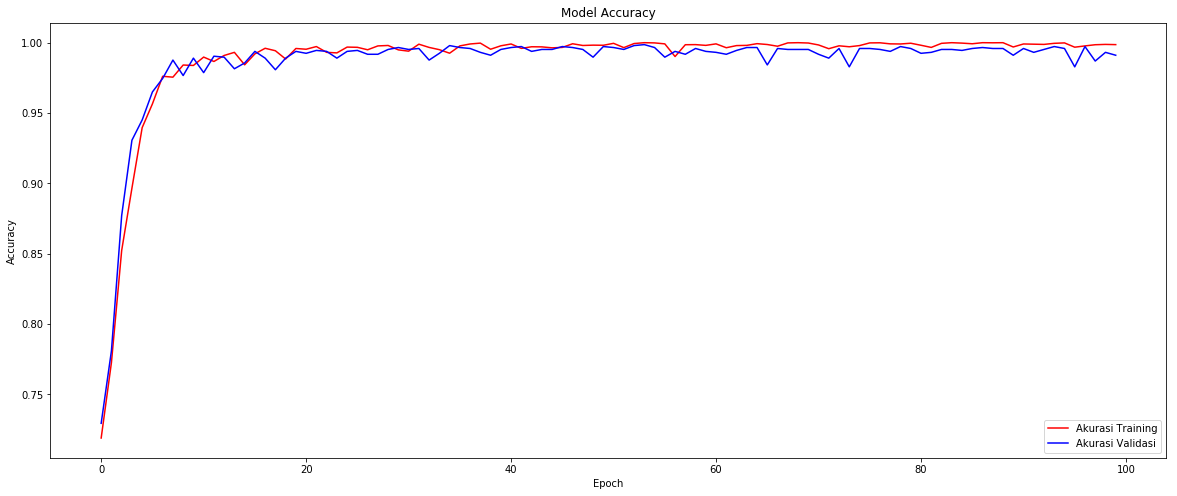

In [30]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(20,8))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

Diatas, merupakan bentuk kurva terhadap model akurasi.

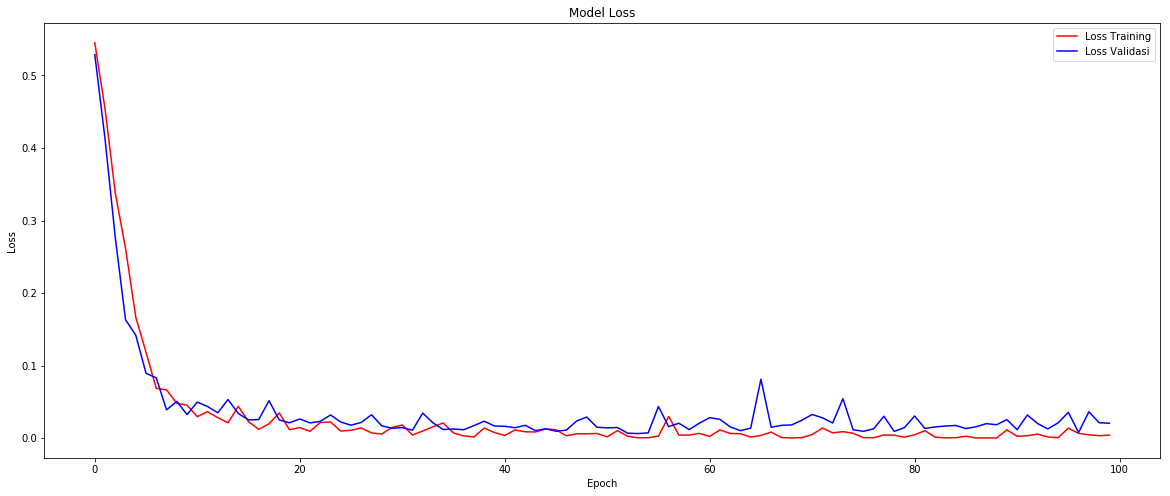

In [31]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(20,8))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

Diatas, merupakan bentuk kurva terhadap model loss.

### =========================================================================================

### KEDELAPAN
Kedelapan, kita dapat membuat model confussion matrixnya. Confusion Matrix ini berfungsi untuk mengukur performa dari model yang telah dibuat. Untuk mengukur performa-nya adalah sebagai berikut:

#### 1.

In [32]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

Pertama membuat model predict dari training_data dan testing_data. Hal ini akan dilihat prediksi apa saja yang telah dibuat oleh model. Biasanya data berbentuk antara rentang dari 1 ke 0. Untuk melihat isi dari data predict sebagai berikut:

In [33]:
training_predicted.round()

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [34]:
testing_predicted.round()

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

#### 2.

In [35]:
training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())

Kemudian setelah dibuat model predictnya, baru dapat dibuat model confussion matrixnya. Confusion matrix yang ada pada program ini dengan tipe label hanya 1 dan 0, maka array dari confusion matrix-nya adalah berbentuk 2x2 seperti gambar dibawah:
<div>
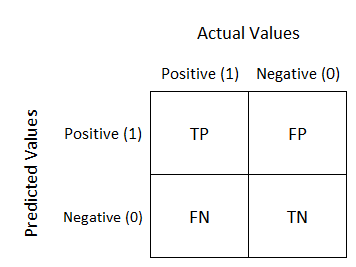
</div>
** sumber foto = https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62 **

Pada isi confusion matrix, terdapat 4 parameter dengan penjelasan sebagai berikut:

1. True Positive (TP)
    TP adalah mendeskripsikan bahwa data tersebut benar sakit dan pada prediksi juga diagnosanya benar sakit.
    
    
2. True Negative (TN)
    TN adalah mendeskripsikan bahwa data tersebut tidak sakit dan pada prediksi juga diagnosanya tidak sakit.


3. False Positive (FP)
    FP adalah mendeskripsikan bahwa data tersebut benar sakit dan pada prediksi diagnosanya tidak sakit.
    
    
4. False Negative (FN)
    FN adalah mendeskripsikan bahwa data tersebut tidak sakit dan pada prediksi diagnosanya sakit.

Maka dengan model confusion matrix tersebut,nantinya confusion matrix ini dapat dihitung beberapa parameter untuk mengukur performanya. Berikut bentuk confusion matrix baik pada training maupun testing:

In [36]:
print("BENTUK CONFUSION MATRIX DARI MODEL TRAINING\n")
training_cm

BENTUK CONFUSION MATRIX DARI MODEL TRAINING



array([[3640,    1],
       [  15, 9440]], dtype=int64)

In [37]:
print("BENTUK CONFUSION MATRIX DARI MODEL TESTING\n")
testing_cm

BENTUK CONFUSION MATRIX DARI MODEL TESTING



array([[ 400,    5],
       [   8, 1043]], dtype=int64)

#### 3.

Kemudian baru didefinisikan lokasi array TP, FP, FN, dan TN-nya baik dari confusion matrix training maupun testing. Hal ini digunakan pada saat mengukur performa dari model yang telah dibuat. Untuk membuatnya dengan cara mengarahkan per-tiap variabel ke nilai yang dituju dalam array dengan cara sebagai berikut:

In [38]:
#Training
tp_train = training_cm[0][0]
fn_train = training_cm[0][1]
fp_train = training_cm[1][0]
tn_train = training_cm[1][1]

#Testing
tp_test = testing_cm[0][0]
fn_test = testing_cm[0][1]
fp_test = testing_cm[1][0]
tn_test = testing_cm[1][1]

#### 4.

Setelah dilakukan pemisahan data berdasarkan array untuk mendapatkan nilai TN, FP, FN, dan TP, maka barulah dapat mengukur performanya baik training maupun testing dengan cara berikut:

1. Accuracy

    Accuracy adalah bagaimana cara untuk mengukur keakuratan dari model yang telah dibuat. Memiliki rumus matematika sebagai berikut:

$$
accuracy\ =\ \frac{(TP\ +\ TN)}{(TP\ +\ TN\ +\ FP\ +\ FN)}{\times\ 100}
$$

    Maka bentuk code-nya ada dibawah ini:

In [39]:
#Training
accuracy_train = (tp_train+tn_train)/(tp_train+tn_train+fp_train+fn_train)

#Testing
accuracy_test = (tp_test+tn_test)/(tp_test+tn_test+fp_test+fn_test)

Maka dari rumus tersebut, mendapatkan hasil akurasi training dan testing sebagai berikut:

In [40]:
print("Accuracy training    = {0}".format(accuracy_train*100),'%\n')
print("Accuracy testing    = {0}".format(accuracy_test*100),'%')

Accuracy training    = 99.87782529016494 %

Accuracy testing    = 99.10714285714286 %


2. Specifity

    Specificity adalah bagaimana cara untuk mengukur kebenaran dalam meprediksi negatif dibandingkan dari keseluruhan data negatif. Memiliki rumus matematika sebagai berikut:
    
$$
specificity\ =\ \frac{TN}{(TN\ +\ FP)}{\times\ 100}
$$

    Maka bentuk code-nya ada dibawah ini:

In [41]:
#Training
specificity_train = tn_train/(tn_train+fp_train)

#Testing
specificity_test = tn_test/(tn_test+fp_test)

Maka dari rumus tersebut, mendapatkan hasil specifity training dan testing sebagai berikut:

In [42]:
print("Specificity training = {0}".format(specificity_train*100),'%\n')
print("Specificity testing = {0}".format(specificity_test*100),'%')

Specificity training = 99.84135378106822 %

Specificity testing = 99.23882017126546 %


3. Sensitivity 

    Sensitivity adalah bagaimana cara untuk mengukur sensitivitas model kita terhadap memprediksi dengan benar. Memiliki rumus matematika sebagai berikut:
    
$$
sensitivity\ =\ \frac{TP}{(TP\ +\ FN)}
$$

    Maka bentuk code-nya ada dibawah ini:

In [43]:
#Training
sensitivity_train = tp_train/(tp_train+fn_train)

#Testing
sensitivity_test = tp_test/(tp_test+fn_test)

Maka dari rumus tersebut, mendapatkan hasil sensitivity training dan testing sebagai berikut:

In [44]:
print("Sensitivity training = {0}".format(sensitivity_train*100),'%\n')
print("Sensitivity testing = {0}".format(sensitivity_test*100),'%')

Sensitivity training = 99.97253501785224 %

Sensitivity testing = 98.76543209876543 %


4. Precision 

    Precision adalah bagaimana cara untuk melihat dari semua prediksi yang benar, berapa banyak yang bernilai positif dan berapa presisi model yang dibuat akan hasil akurasi. Memiliki rumus matematika sebagai berikut:

$$
precision\ =\ \frac{TP}{(TP\ +\ FP)}
$$

    Maka bentuk code-nya ada dibawah ini:

In [45]:
#Training
precision_train = tp_train/(tp_train+fp_train)

#Testing
precision_test = tp_test/(tp_test+fp_test)

Maka dari rumus tersebut, mendapatkan hasil Presisi training dan testing sebagai berikut:

In [46]:
print("Precision training   = {0}".format(precision_train*100),'%\n')
print("Precision testing   = {0}".format(precision_test*100),'%')

Precision training   = 99.58960328317373 %

Precision testing   = 98.0392156862745 %


5. F1 Score 

    F1 Score adalah bagaimana cara untuk mengukur performa terhadap sensitivitas dengan presisi terhadap model yang telah dibuat pada waktu yang bersamaan. Memiliki rumus matematika sebagai berikut:

$$
F1\ Score\ =\ \frac{(2\ \times\ sensitivity\ \times\ precision)}{(sensitivity\ +\ precision)}
$$

    Maka bentuk code-nya ada dibawah ini:

In [47]:
#Training
f1_score_train = (2*sensitivity_train*precision_train)/(sensitivity_train+precision_train)

#Testing
f1_score_test = (2*sensitivity_test*precision_test)/(sensitivity_test+precision_test)

Maka dari rumus tersebut, mendapatkan hasil F1 Score training dan testing sebagai berikut:

In [48]:
print("F1 Score training    = {0}".format(f1_score_train*100),'%\n')
print("F1 Score testing    = {0}".format(f1_score_test*100),'%')

F1 Score training    = 99.78070175438596 %

F1 Score testing    = 98.40098400984009 %


### =========================================================================================

### KESIMPULAN

        Kesimpulan yang dapat ditarik dari program "Pendeteksian Penyakit Myocardial Infarction dengan Metode Covolutional Neural Network 1-Dimension (CNN 1D)" ini adalah bahwa dengan menggunakan metode CNN 1D yang telah di tunning oleh penulis bisa mendapatkan akurasi hingga 99.1% terhadap model testing. Berdasarkan performa model ini dari confusion matrix hasilnya sudah bagus, maka metode ini dalam melakukan pendeteksian penyakit Myocardial Infarction memiliki performa yang baik pada metode CNN 1D. 
        
        Selain itu, bentuk kurva baik pada model accuracy maupun loss hampir mendekati model fit dimana antara loss dan accuracy baik pada training maupun testing sudah hampir mendekati sejajar dan berbentuk terbalik (mirror) pada kedua sisi fungsi loss dengan fungsi akurasi. 
        
        Pada data juga dilakukan pre-processing terlebih dahulu dengan MinMax Scaler untuk menskalakan data ke bentuk 0 dan 1. Tujuannya agar performa yang dihasilkan dalam mengenali fitur dapat jauh lebih bagus dibandingkan tanpa dilakukan pre-processing.

### =========================================================================================

### REFRENSI

Pada pembuatan porgram ini, memiliki refrensi sebagai berikut

1. Paper

    Pada paper berdasarkan refrensi dari judul: Myocardial Infarction Classification Based on Convolutional Neural Network and Recurrent Neural Network
    
    Paper tersebut berada pada tautan : https://www.mdpi.com/2076-3417/9/9/1879
    
    
2. Datasheet
    Datasheet yang digunakan berasal dari rujukan paper yaitu PTBDB yang ada di physionet, akan tetapi pada percobaan ini, versi PTBDB Phtsionet untuk penyakit myocardial infarction terdapat versi kagglenya dengan ada 2 dataset yaitu PTBDB_Normal dan PTBDB_Abnormal pada tautan berikut : https://www.kaggle.com/shayanfazeli/heartbeat

### =========================================================================================